# Reinforcement Learning Solution to the Towers of Hanoi Puzzle

Anurag Kumar

In this assignment, I have used reinforcement learning to solve the [Towers of Hanoi](https://en.wikipedia.org/wiki/Tower_of_Hanoi) puzzle.  

To accomplish this, I have borrowed and modified the code discussed in lecture for learning to play Tic-Tac-Toe so that it learns to solve the three-disk, three-peg
Towers of Hanoi Puzzle.  pler than the
Tic-Tac-Toe code.  

The following steps were implemented as asked in the assignment:

  - Represent the state, and use it as a tuple as a key to the Q dictionary.
  - Make sure only valid moves are tried from each state.
  - Assign reinforcement of $-1$ to each move unless it is a move to the goal state, for which the reinforcement is $0$.  This represents the goal of finding the shortest path to the goal.

There is a plot of the number of steps required to reach the goal for each
trial.  Each trial starts from the same initial state.  Decay epsilon
is as in the Tic-Tac-Toe code.

## Requirements

In order to keep track of which disks are on which pegs, we named the disks 1, 2, and 3, with 1 being the smallest disk and 3 being the largest. The set of disks on a peg is represented as a list of integers. And the state is a list of three lists.

For example, the starting state is represented with all disks being on the left peg i.e. `[[1, 2, 3], [], []]`.  After moving disk 1 to peg 2, we have `[[2, 3], [1], []]`.

To represent that move we just made, we can use a list of two peg numbers, like `[1, 2]`, representing a move of the top disk on peg 1 to peg 2.


Here are some functions which are used in the implementation :

   - `stateMoveTuple(state, move)`: returns tuple of state and move. This is useful for converting state and move to a key to be used for the Q dictionary.
   - `printState(state)`: prints the state in the form shown below
   - `validMoves(state)`: returns list of moves that are valid from `state`
   - `makeMove(state, move)`: returns new (copy of) state after move has been applied.
   - `trainQ(nRepetitions, learningRate, epsilonDecayFactor, validMovesF, makeMoveF)`: train the Q function for number of repetitions, decaying epsilon at start of each repetition. Returns Q and list or array of number of steps to reach goal for each repetition.
   - `testQ(Q, maxSteps, validMovesF, makeMoveF)`: without updating Q, use Q to find greedy action each step until goal is found. Return path of states.

     
    


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import copy
def makeMove(state, move):
    newState = copy.deepcopy(state)
    i = move[0]-1
    j = move[1]-1
    newState[i].reverse()
    k = newState[i].pop()
    newState[i].reverse()
    newState[j].insert(0,k)
    return newState

In [3]:
def printState(state):
    p=len(state[0])
    q=len(state[1])
    r=len(state[2])
    n=p+q+r
    for j in range(n):
        print('{} {} {}'.format(state[0][n-p-j] if n-p<=j else ' ',state[1][n-q-j] if n-q<=j else ' ',state[2][n-r-j] if n-r<=j else ' '))
    print('-----')

In [4]:
def stateMoveTuple(state, move):
    result=[0]*3
    final =[0]*2
    for i in range(3):
        result[i]=(tuple(state[i]))
    final[0] = tuple(result)
    final[1] = (tuple(move))
    return tuple(final)

In [5]:
def validMoves(state):
    moves = []
    if state[0] != []:
        if  state[1] == [] or state[0][0] < state[1][0]:
            moves.append([1,2])
        if state[2] == [] or state[0][0] < state[2][0]:
            moves.append([1,3])
    if state[1] != []:
        if state[0] == [] or state[1][0] < state[0][0]:
            moves.append([2,1])
        if state[2] == [] or state[1][0] < state[2][0]:
            moves.append([2,3])
    if state[2] != []:
        if state[1] == [] or state[2][0] < state[1][0]:
            moves.append([3,2])
        if state[0] == [] or state[2][0] < state[0][0]:
            moves.append([3,1])
    if moves == []:
        printState(state)
    
    return moves

In [6]:
def epsilonGreedy(epsilon, Q, state, validMovesF):
    moves = validMovesF(state) # validMoves returns a list of possible valid moves
    if np.random.uniform() < epsilon:
        #Random move
        return moves[np.random.choice(range(len(moves)))] # a move in this form [1,2]
    else:
        #greedy move
        Qs = np.array([Q.get(stateMoveTuple(state,move),0) for move in moves])
        return moves[np.argmin(Qs)]  #### changed from moves[np.argmax(Qs)] 

In [7]:
def greedyMove(Q, state, validMovesF):
    moves = validMovesF(state)
    Qs = np.array([Q.get(stateMoveTuple(state,move),0) for move in moves])
    print(Qs)
    return moves[np.argmin(Qs)]  ######### changed from moves[np.argmax(Qs)]

In [8]:
import copy
def trainQ(nRepetitions, learningRate, epsilonDecayFactor, validMovesF, makeMoveF):
    Q = {}
    stepsToGoal = [0]*nRepetitions                 # will hold the number of steps required to reach the goal for each iteration
    rho = learningRate                             ################# Changed from 0.2
    epsilon = 1.0                                  # initialized to 1 and decreases slowly according to the decayfactor 
    epsilons = np.zeros(nRepetitions)              # stores the epsilon value of each iteration
    for nGames in range(nRepetitions):             # the training of Q begins
        if nGames > 0:                             # epsilon is 1 for 1st run
            epsilon *= epsilonDecayFactor          # decayFactor is a number between (0,1)
        epsilons[nGames] = epsilon
        step = 0                                   # this maintains the count of steps
        state = [[1,2,3],[],[]]                    # initial state for 3 disks 3 pegs tower of hanoi problem
                                                   # It starts from start state everytime...but one can use random state too
        done = False                               # used to break out of the while loop as soon as we reach the goal state
        
        while not done:                            # searching for goal begins
            step += 1                              # increment the step to keep the count
            move = epsilonGreedy(epsilon, Q, state, validMovesF) # The epsilonGreedy() returns a move selected either randomly
            # or from the existing values in Q depending upon the epsilon value. validMovesF is used to generate valid moves
            newstate = makeMoveF(state, move)      # returns a new list after performing the given move on the given state 
            
            if stateMoveTuple(state, move) not in Q: # Check if the state,move pair exists in the Q dictionary or not
                '''with reinforcement of -10 for each move and 1 for the winning move, the trainQ always finds the optimal path'''
                #Q[stateMoveTuple(state, move)] = -10
                Q[stateMoveTuple(state, move)] = -1 # if not, then add it to the dictionary and assign a reinforcement of -1 
                                                   # Here instead of -1 if we assign -10, then trainQ always find an optimal path
                                                   # but in this case it finds optimal path only 99% of times
            if newstate == [[],[],[1,2,3]]:        # Check for goalState
                #Q[stateMoveTuple(state, move)] = 1
                Q[stateMoveTuple(state, move)] = 0 # if true, then assign the state,move pair which 
                                                   # led to that state a reinforcement of 0
                done = True                        # break the while loop
                stepsToGoal[nGames] = step         # this is the final count of steps
            
            # all steps after the 1st, update the Q values to guide it towards goalState   
            if step > 1:                           # Added 1 right below and used argmin in epsilongreedy and greedy
                Q[stateMoveTuple(stateOld, moveOld)] += rho * (1+Q[stateMoveTuple(state, move)] - Q[stateMoveTuple(stateOld, moveOld)])
            
            stateOld, moveOld = copy.deepcopy(state) , copy.copy(move) # make a copy of current state,move and store it separately
            state = newstate                       # update the current state to the new state
        
    return Q, stepsToGoal                          # returns Q as a dictionary and list of step counts

In [9]:
def testQ(Q, maxSteps, validMovesF, makeMoveF):   # maxSteps - Maximum number of steps allowed to find the goal
    steps = 0                                     # step counter
    state = [[1,2,3],[],[]]                       # initial position
    path = [state]                                # list of all states from starting to goalState (the initial state is not counted as a step)
    while steps < maxSteps:
        steps += 1                                # increment counter
        move = greedyMove(Q, state, validMovesF)  # greedyMove returns the best move for any given state according to the Q values
        newstate = makeMoveF(state , move)        # makeMoveF returns a new state
        path.append(newstate)                     # append that state to the path list
        if newstate[2] == [1,2,3]:                # check for goal state
            return path                           # return a list of path as soon as the goal is found 
        state = newstate                          # otherwise update state to newState
    return 'Could not find a path in {} steps'.format(maxSteps) # return this if maxSteps is not sufficient to find a path

In [10]:
state = [[1, 2, 3], [], []]
printState(state)

1    
3    
2    
-----


In [11]:
move =[1, 2]

stateMoveTuple(state, move)

(((1, 2, 3), (), ()), (1, 2))

In [12]:
newstate = makeMove(state, move)
newstate

[[2, 3], [1], []]

In [13]:
printState(newstate)

     
2    
3 1  
-----


In [14]:
Q, stepsToGoal = trainQ(50, 0.5, 0.7, validMoves, makeMove)

In [15]:
len(Q)

76

In [16]:
Q

{(((), (1,), (2, 3)), (2, 1)): 0.625,
 (((), (1,), (2, 3)), (2, 3)): 0,
 (((), (1,), (2, 3)), (3, 1)): 0.0,
 (((), (1, 2), (3,)), (2, 1)): 1.9999999999301012,
 (((), (1, 2), (3,)), (2, 3)): 2.1629048585891724,
 (((), (1, 2), (3,)), (3, 1)): 3.3366904258728027,
 (((), (1, 2, 3), ()), (2, 1)): 4.018117070198059,
 (((), (1, 2, 3), ()), (2, 3)): 3.89581298828125,
 (((), (1, 3), (2,)), (2, 1)): 3.683319091796875,
 (((), (1, 3), (2,)), (2, 3)): 3.754547119140625,
 (((), (1, 3), (2,)), (3, 1)): 3.481109619140625,
 (((), (2,), (1, 3)), (2, 1)): 2.05419921875,
 (((), (2,), (1, 3)), (3, 1)): 1.7320656776428223,
 (((), (2,), (1, 3)), (3, 2)): 1.6951770782470703,
 (((), (2, 3), (1,)), (2, 1)): 3.7381176948547363,
 (((), (2, 3), (1,)), (3, 1)): 3.82904052734375,
 (((), (2, 3), (1,)), (3, 2)): 3.9537353515625,
 (((), (3,), (1, 2)), (2, 1)): 4.137738943099976,
 (((), (3,), (1, 2)), (3, 1)): 4.0068817138671875,
 (((), (3,), (1, 2)), (3, 2)): 3.9919281005859375,
 (((1,), (), (2, 3)), (1, 2)): 0.25,
 ((

In [17]:
stepsToGoal

[188,
 31,
 47,
 18,
 138,
 17,
 47,
 30,
 56,
 16,
 38,
 14,
 7,
 7,
 11,
 8,
 7,
 7,
 37,
 7,
 7,
 8,
 7,
 14,
 7,
 7,
 7,
 10,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7]

In [18]:
path = testQ(Q, 20, validMoves, makeMove)

[ 6.06880475  5.99999843]
[ 4.9999998   5.09583708  5.75928847]
[ 4.86979332  3.99999998  4.26528394]
[ 3.          3.3443718   3.31138897]
[ 2.          2.16290486  3.33669043]
[ 1.6952095   1.53222656  1.        ]
[ 0.25        0.          0.34460449]


In [19]:
path

[[[1, 2, 3], [], []],
 [[2, 3], [], [1]],
 [[3], [2], [1]],
 [[3], [1, 2], []],
 [[], [1, 2], [3]],
 [[1], [2], [3]],
 [[1], [], [2, 3]],
 [[], [], [1, 2, 3]]]

In [20]:
len(path)

8

In [21]:
for s in path:
    printState(s)
    print()

1    
3    
2    
-----

     
2    
3   1
-----

     
     
3 2 1
-----

     
  1  
3 2  
-----

     
  1  
  2 3
-----

     
     
1 2 3
-----

     
    2
1   3
-----

    1
    3
    2
-----



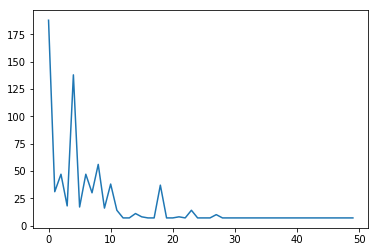

In [22]:
plt.plot(stepsToGoal)

# Examples

In [2]:
state = [[1, 2, 3], [], []]
printState(state)

1     
2     
3     
------



In [3]:
move =[1, 2]

stateMoveTuple(state, move)

(((1, 2, 3), (), ()), (1, 2))

In [4]:
newstate = makeMove(state, move)
newstate

[[2, 3], [1], []]

In [5]:
printState(newstate)

2     
3 1   
------



In [6]:
Q, stepsToGoal = trainQ(50, 0.5, 0.7, validMoves, makeMove)

In [7]:
stepsToGoal

array([ 178.,   23.,   77.,   60.,   14.,    7.,   36.,   28.,    9.,
          7.,   10.,   17.,   44.,    8.,   16.,    7.,   22.,    7.,
         11.,    7.,   10.,    7.,    7.,    7.,    7.,    7.,    7.,
          7.,    7.,    7.,    7.,    7.,    7.,    7.,    7.,    7.,
          7.,    7.,    7.,    7.,    7.,    7.,    7.,    7.,    7.,
          7.,    7.,    7.,    7.,    7.])

In [8]:
path = testQ(Q, 20, validMoves, makeMove)

In [9]:
path

[[[1, 2, 3], [], []],
 [[2, 3], [], [1]],
 [[3], [2], [1]],
 [[3], [1, 2], []],
 [[], [1, 2], [3]],
 [[1], [2], [3]],
 [[1], [], [2, 3]],
 [[], [], [1, 2, 3]]]

In [10]:
for s in path:
    printState(s)
    print()

1     
2     
3     
------


2     
3   1 
------


3 2 1 
------


  1   
3 2   
------


  1   
  2 3 
------


1 2 3 
------


    2 
1   3 
------


    1 
    2 
    3 
------




## Extra Credit

Modify your code to solve the Towers of Hanoi puzzle with 4 disks instead of 3.  Name your functions

    - printState_4disk
    - validMoves_4disk
    - makeMove_4disk

Find values for number of repetitions, learning rate, and epsilon decay factor for which trainQ learns a Q function that testQ can use to find the shortest solution path.  Include the output from the successful calls to trainQ and testQ.

## Attention:

### printState_4disk, validMoves_4disk, makeMove_4disk are not required as printState(), ValidMoves() and makeMove() works for any number of disks. So, I have just defined trainQ_4disk() and testQ_4disk() in order to implement tower of honoi with 4 disks.    

The code and the working of the functions trainQ_4disk() and testQ_4disk() are same as trainQ() and testQ() with the following
changes:
    - Initial state is [[1,2,3,4],[],[]] instead of [[1,2,3],[],[]]
    - Goal state is [[],[],[1,2,3,4]] instead of [[],[],[1,2,3]]

In [23]:
printState([[1],[2],[3,4]])

     
     
    3
1 2 4
-----


In [24]:
validMoves([[],[3],[1,2,4]])

[[2, 1], [3, 2], [3, 1]]

In [25]:
makeMove([[],[3],[1,2,4]],[3,1])

[[1], [3], [2, 4]]

In [26]:
stateMoveTuple([[],[3],[1,2,4]],[3,1])

(((), (3,), (1, 2, 4)), (3, 1))

In [27]:
import copy
def trainQ_4disk(nRepetitions, learningRate, epsilonDecayFactor, validMovesF, makeMoveF):
    Q = {}
    stepsToGoal = [0]*nRepetitions
    rho = learningRate 
    epsilon = 1.0  
    outcomes = np.zeros(nRepetitions)
    epsilons = np.zeros(nRepetitions)
    for nGames in range(nRepetitions):
        if nGames > 0:
            epsilon *= epsilonDecayFactor
        epsilons[nGames] = epsilon
        step = 0
        state = [[1,2,3,4],[],[]]
        done = False
        
        while not done:
            step += 1
            move = epsilonGreedy(epsilon, Q, state, validMovesF)
            newstate = makeMoveF(state, move)
            if stateMoveTuple(state, move) not in Q:
                Q[stateMoveTuple(state, move)] = -1
            if newstate == [[],[],[1,2,3,4]]:
                Q[stateMoveTuple(state, move)] = 0
                done = True
                outcomes[nGames] = 1
                stepsToGoal[nGames] = step
            if step > 1:                                    # Added 1 right below and used argmin in epsilongreedy and greedy
                Q[stateMoveTuple(stateOld, moveOld)] += rho * (1+Q[stateMoveTuple(state, move)] - Q[stateMoveTuple(stateOld, moveOld)])
            
            stateOld, moveOld = copy.deepcopy(state) , copy.copy(move)
            state = newstate

    return Q, stepsToGoal

In [28]:
def testQ_4disk(Q, maxSteps, validMovesF, makeMoveF):
    steps = 0
    state = [[1,2,3,4],[],[]]
    path = [state]
    while steps < maxSteps:
        steps += 1
        move = greedyMove(Q, state, validMovesF)
        newstate = makeMoveF(state , move)
        path.append(newstate)
        if newstate[2] == [1,2,3,4]:
            return path
        state = newstate
    return 'Could not find a path in {} steps'.format(maxSteps)

In [29]:
Q, stepsToGoal = trainQ_4disk(100, 0.5, 0.7, validMoves, makeMove)

In [30]:
path = testQ_4disk(Q, 50, validMoves, makeMove)

[ 13.99999999  14.04711511]
[ 13.          13.88080518  13.21434608]
[ 12.20931422  12.          12.29041851]
[ 11.          11.32664766  11.49880182]
[ 10.075841    10.05432581  10.        ]
[ 9.2029394   9.54815113  9.        ]
[ 8.          8.07929152  8.17214987]
[ 7.          7.77838207  7.16473822]
[ 6.19513246  6.          6.24183309]
[ 5.          5.15658665  5.44032097]
[ 4.53909206  4.15725708  4.        ]
[ 3.54075623  3.17803955  3.        ]
[ 2.          2.20898438  2.4074707 ]
[ 1.          1.95385742  1.62890625]
[ 0.25     0.       0.09375]


In [31]:
path

[[[1, 2, 3, 4], [], []],
 [[2, 3, 4], [1], []],
 [[3, 4], [1], [2]],
 [[3, 4], [], [1, 2]],
 [[4], [3], [1, 2]],
 [[1, 4], [3], [2]],
 [[1, 4], [2, 3], []],
 [[4], [1, 2, 3], []],
 [[], [1, 2, 3], [4]],
 [[], [2, 3], [1, 4]],
 [[2], [3], [1, 4]],
 [[1, 2], [3], [4]],
 [[1, 2], [], [3, 4]],
 [[2], [1], [3, 4]],
 [[], [1], [2, 3, 4]],
 [[], [], [1, 2, 3, 4]]]

In [32]:
for s in path:
    printState(s)
    print()

1    
4    
3    
2    
-----

     
2    
4    
3 1  
-----

     
     
3    
4 1 2
-----

     
     
3   1
4   2
-----

     
     
    1
4 3 2
-----

     
     
1    
4 3 2
-----

     
     
1 2  
4 3  
-----

     
  1  
  3  
4 2  
-----

     
  1  
  3  
  2 4
-----

     
     
  2 1
  3 4
-----

     
     
    1
2 3 4
-----

     
     
1    
2 3 4
-----

     
     
1   3
2   4
-----

     
     
    3
2 1 4
-----

     
    2
    4
  1 3
-----

    1
    4
    3
    2
-----



In [33]:
len(path)

16

In [34]:
Q

{(((), (1,), (2, 3, 4)), (2, 1)): 0.25,
 (((), (1,), (2, 3, 4)), (2, 3)): 0,
 (((), (1,), (2, 3, 4)), (3, 1)): 0.09375,
 (((), (1, 2), (3, 4)), (2, 1)): 1.999931812286377,
 (((), (1, 2), (3, 4)), (2, 3)): 2.208984375,
 (((), (1, 2), (3, 4)), (3, 1)): 2.43670654296875,
 (((), (1, 2, 3), (4,)), (2, 1)): 6.195132464170456,
 (((), (1, 2, 3), (4,)), (2, 3)): 6.0,
 (((), (1, 2, 3), (4,)), (3, 1)): 6.241833087056875,
 (((), (1, 2, 3, 4), ()), (2, 1)): 8.288085420615971,
 (((), (1, 2, 3, 4), ()), (2, 3)): 8.479463149560615,
 (((), (1, 2, 4), (3,)), (2, 1)): 8.905134782580717,
 (((), (1, 2, 4), (3,)), (2, 3)): 8.853903296425415,
 (((), (1, 2, 4), (3,)), (3, 1)): 8.694639205990825,
 (((), (1, 3), (2, 4)), (2, 1)): 4.784328460693359,
 (((), (1, 3), (2, 4)), (2, 3)): 5.009601593017578,
 (((), (1, 3), (2, 4)), (3, 1)): 4.706969439983368,
 (((), (1, 3, 4), (2,)), (2, 1)): 8.139749833848327,
 (((), (1, 3, 4), (2,)), (2, 3)): 8.082094090525061,
 (((), (1, 3, 4), (2,)), (3, 1)): 8.365418584784493,
 (((

In [35]:
Q, stepsToGoal = trainQ_4disk(50, 0.5, 0.7, validMoves, makeMove)

In [36]:
path = testQ_4disk(Q, 50, validMoves, makeMove)

[ 13.1233567  13.1017834]
[ 12.50366706  12.78549673  13.01268582]
[ 12.56374449  12.02303062  11.94671012]
[ 11.77581636  12.23057906  11.69153519]
[ 11.77249336  11.4908276   11.88064393]
[ 10.83078703  11.29401875  11.59339226]
[ 10.17340663   9.93697112   9.94552045]
[  9.46227324  10.06779108   9.69449901]
[ 9.61285041  9.00000549  8.98541362]
[ 7.99694137  8.13057744  8.96026718]
[ 6.99975449  7.23822373  7.27758423]
[ 6.16547898  5.99997031  6.29588292]
[ 4.9999982   5.46885039  5.41706665]
[ 4.0479126   4.10559082  4.00000006]
[ 3.13012695  3.11572266  3.00000003]
[ 2.          2.21533203  2.17089844]
[ 1.         1.4921875  1.5234375]
[ 0.70507812  0.          1.3515625 ]


In [37]:
path

[[[1, 2, 3, 4], [], []],
 [[2, 3, 4], [], [1]],
 [[3, 4], [2], [1]],
 [[1, 3, 4], [2], []],
 [[1, 3, 4], [], [2]],
 [[3, 4], [], [1, 2]],
 [[4], [3], [1, 2]],
 [[4], [1, 3], [2]],
 [[1, 4], [3], [2]],
 [[1, 4], [2, 3], []],
 [[4], [1, 2, 3], []],
 [[], [1, 2, 3], [4]],
 [[], [2, 3], [1, 4]],
 [[2], [3], [1, 4]],
 [[1, 2], [3], [4]],
 [[1, 2], [], [3, 4]],
 [[2], [1], [3, 4]],
 [[], [1], [2, 3, 4]],
 [[], [], [1, 2, 3, 4]]]

In [38]:
len(path)

19

In [42]:
Q, stepsToGoal = trainQ_4disk(70, 0.5, 0.7, validMoves, makeMove)

In [43]:
path = testQ_4disk(Q, 50, validMoves, makeMove)

[ 14.00330484  14.0549426 ]
[ 13.00151998  13.27014752  13.18412807]
[ 12.27192002  12.00055572  12.78962625]
[ 11.00016713  11.2350865   11.3495722 ]
[ 10.46323098  10.21954952  10.00004234]
[ 9.67889226  9.78390886  9.00000931]
[ 8.00000183  8.14311598  8.9460587 ]
[ 7.00000032  7.51898922  7.5698605 ]
[ 6.17505574  6.00000005  6.30738199]
[ 5.00000001  5.74205029  5.22482681]
[ 4.84802055  4.41491699  4.        ]
[ 3.87585449  3.66162109  3.        ]
[ 2.          2.78912354  3.35266113]
[ 1.          1.75097656  2.16625977]
[ 1.    0.    0.75]


In [44]:
path

[[[1, 2, 3, 4], [], []],
 [[2, 3, 4], [1], []],
 [[3, 4], [1], [2]],
 [[3, 4], [], [1, 2]],
 [[4], [3], [1, 2]],
 [[1, 4], [3], [2]],
 [[1, 4], [2, 3], []],
 [[4], [1, 2, 3], []],
 [[], [1, 2, 3], [4]],
 [[], [2, 3], [1, 4]],
 [[2], [3], [1, 4]],
 [[1, 2], [3], [4]],
 [[1, 2], [], [3, 4]],
 [[2], [1], [3, 4]],
 [[], [1], [2, 3, 4]],
 [[], [], [1, 2, 3, 4]]]

In [45]:
len(path)

16

In [76]:
Q, stepsToGoal = trainQ_4disk(50, 0.5, 0.99, validMoves, makeMove)

In [77]:
path = testQ_4disk(Q, 20, validMoves, makeMove)

[ 31.82800756  31.78221503]
[ 30.94008183  31.51030572  31.48917005]
[ 31.65840385  31.29343582  30.91654699]
[ 31.08401107  31.28875055  30.63629797]
[ 29.79181401  30.32786916  30.53236091]
[ 29.86332934  29.14542206  31.05797117]
[ 28.28957394  30.790016    29.69552346]
[ 28.91284094  27.71739022  27.15795723]
[ 27.15564147  27.23637112  26.1444365 ]
[ 22.30678135  24.30373337  26.92337025]
[ 21.27933147  24.82312204  25.4209344 ]
[ 19.91216334  17.00944211  24.80796614]
[ 15.89897297  21.35718692  18.79269747]
[ 16.18523664  14.01526229  15.97882554]
[ 17.78608191  11.21714871  15.95545374]
[ 13.19035262  16.15679179   8.38006839]
[  3.96972154   9.76537727  10.49909968]
[ 1.06885192  9.72535991  9.61440131]
[ 3.3363961   0.          8.80282867]


In [78]:
path

[[[1, 2, 3, 4], [], []],
 [[2, 3, 4], [], [1]],
 [[3, 4], [2], [1]],
 [[1, 3, 4], [2], []],
 [[1, 3, 4], [], [2]],
 [[3, 4], [1], [2]],
 [[3, 4], [], [1, 2]],
 [[4], [3], [1, 2]],
 [[1, 4], [3], [2]],
 [[1, 4], [2, 3], []],
 [[4], [1, 2, 3], []],
 [[], [1, 2, 3], [4]],
 [[], [2, 3], [1, 4]],
 [[2], [3], [1, 4]],
 [[2], [1, 3], [4]],
 [[1, 2], [3], [4]],
 [[1, 2], [], [3, 4]],
 [[2], [1], [3, 4]],
 [[], [1], [2, 3, 4]],
 [[], [], [1, 2, 3, 4]]]

In [79]:
len(path)

20